---
layout: page
title: Regressão Múltipla
nav_order: 13
---

[<img src="https://github.com/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/colab_favicon_small.png?raw=1" style="float: right;">](https://colab.research.google.com/github/flaviovdf/icd-bradesco/blob/master/_lessons/13-Multipla.ipynb)


# Tópico 13 - Regressão Múltipla

{: .no_toc .mb-2 }

Entendimento de relação entre dados.
{: .fs-6 .fw-300 }

{: .no_toc .text-delta }
Resultados Esperados

1. Entender a Regressão com Vários Fatores

In [1]:
# -*- coding: utf8

from scipy import stats as ss

import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
plt.style.use('ggplot')

Continuando da aula passada, vamos agora focar em casos mais específicos de regressão. Nesta aula, vamos estender a ideia de mínimos quadrados e de regressão linear para modelos mais complexos. Para tal, vamos continuar nosso foco nos dados de preços de apartamentos em BH.

## Dados

Observe como temos 4 possíveis preditores de preço:
1. Area
1. Quartos
1. Suites
1. Vagas

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/icd-ufmg/material/master/aulas/19-Multipla/aptosBH.txt', index_col=0)
df.head()

,area,quartos,suites,vagas,preco
ID,,,,,
353534.0,110.00,3.0,1.0,2.0,880000.0
366113.0,101.89,3.0,1.0,4.0,900000.0
186728.0,191.00,3.0,1.0,3.0,920000.0
366115.0,101.89,3.0,1.0,4.0,950000.0
353022.0,280.61,3.0,1.0,4.0,1000000.0


Cada preditor é de uma forma correlacionado com o preço. No pairplot abaixo, preste atenção na última coluna.

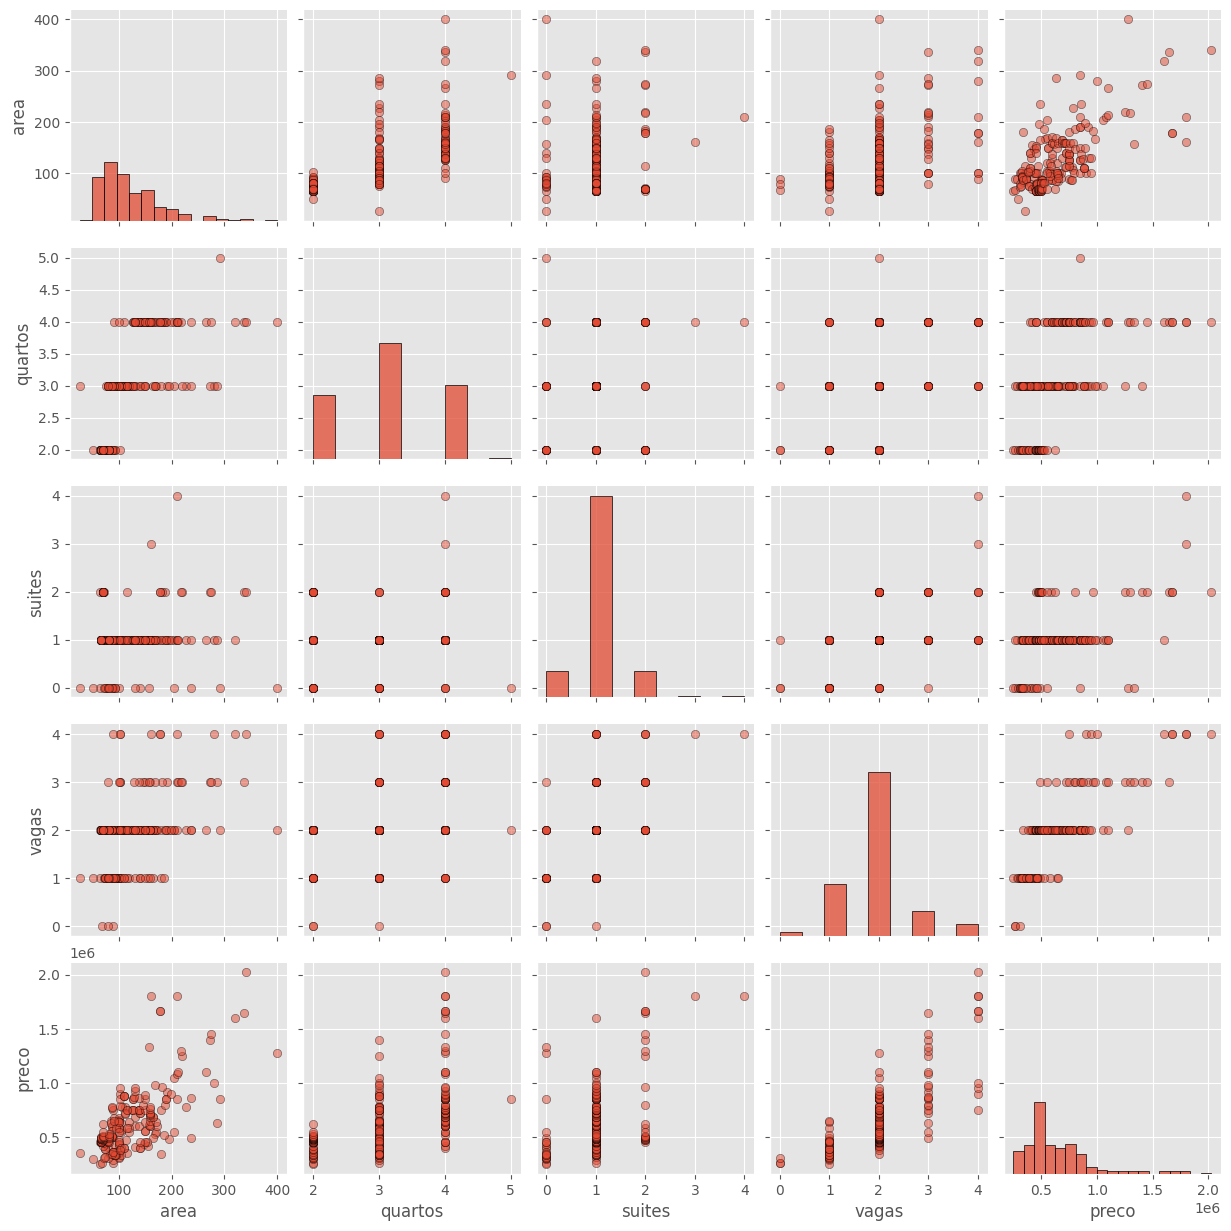

In [4]:
sns.pairplot(df, diag_kws={'edgecolor':'k'}, plot_kws={'alpha':0.5, 'edgecolor':'k'})

## Regressão Múltipla

Para realizar uma regressão múltipla, vamos representar nossos dados na forma matricial. Sendo `n` o número de linhas nos nossos dados (observações) e `f` o número de colunas (features/atríbutos). Os dados podem ser vistos como a matriz abaixo:

$$
\mathbf{X} = \begin{pmatrix}\mathbf {x} _{1}^{\mathsf {T}}\\\mathbf {x} _{2}^{\mathsf {T}}\\\vdots \\\mathbf {x} _{n}^{\mathsf {T}}\end{pmatrix} =\begin{pmatrix}1&x_{11}&\cdots &x_{1f}\\1&x_{21}&\cdots &x_{2f}\\\vdots &\vdots &\ddots &\vdots \\1&x_{n1}&\cdots &x_{nf}\end{pmatrix}
$$

Observe como a primeira coluna é toda `1`. A mesma vai capturar o fator constante, intercepto, da regressão linear. O nosso modelo é capturado pela equação abaixo:

$$
y_i = \theta_0 x_{i0} + \theta_1 x_{i1}^{1} + \theta_2 x_{i2}^{2} + \cdots + \theta_f x_{if}^{f} + \epsilon_i
$$.

Aqui, $x_{i0} = 1$ sempre! Por isso usamos uma coluna de 1s.

$$
y_i = \theta_0 + \theta_1 x_{i1}^{1} + \theta_2 x_{i2}^{2} + \cdots + \theta_f x_{if}^{f} + \epsilon_i
$$.

Vamos organizar uma matrix de fatores explanatórios X usando pandas.

In [5]:
y = df['preco']
X = df[['area', 'quartos', 'suites', 'vagas']]
X['intercepto'] = 1
X = X[['intercepto', 'area', 'quartos', 'suites', 'vagas']]
X.head()

,intercepto,area,quartos,suites,vagas
ID,,,,,
353534.0,1,110.00,3.0,1.0,2.0
366113.0,1,101.89,3.0,1.0,4.0
186728.0,1,191.00,3.0,1.0,3.0
366115.0,1,101.89,3.0,1.0,4.0
353022.0,1,280.61,3.0,1.0,4.0


Temos 216 observações.

In [6]:
y.shape

(216,)

5 atributos, onde um deles é o intercepto.

In [7]:
X.shape

(216, 5)

```python
X.values
```

retorna a matriz.

In [8]:
X.values

array([[  1.  , 110.  ,   3.  ,   1.  ,   2.  ],
       [  1.  , 101.89,   3.  ,   1.  ,   4.  ],
       [  1.  , 191.  ,   3.  ,   1.  ,   3.  ],
       ...,
       [  1.  ,  70.  ,   2.  ,   2.  ,   2.  ],
       [  1.  ,  70.  ,   2.  ,   2.  ,   2.  ],
       [  1.  , 115.  ,   3.  ,   1.  ,   2.  ]])

Sendo $\mathbf{y}$ a nossa resposta. Na forma matricial o nosso modelo tem a seguinte forma:


$$\mathbf {y} =\mathbf{X}{\boldsymbol {\theta }}+{\boldsymbol {\varepsilon }} $$

Observa na figura abaixo como cada observação $y_i$ vai ser capturada pelo modelo linear $y_i = \theta_0 + \theta_1 x_{i1}^{1} + \theta_2 x_{i2}^{2} + \cdots + \theta_f x_{if}^{f} + \epsilon_i$. Basta pensar em operações de matrizes e vetores como somatórios! Cada linha de $\mathbf{X}$ multiplica um vetor de parâmetros $\theta$.

![](https://github.com/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/f.png?raw=1)

Nossa função de perda na forma matricial é:

$$L({\boldsymbol {\theta }}) = n^{-1} ||\mathbf{y} - \mathbf{X} {\boldsymbol {\theta }}||^2_2$$

A bela arte abaixo demonstra a ideia. Enquanto multplicação de matrizes capturam somatórios, a norma L2 (acima) capturam uma soma ao quadrado.

![](https://github.com/icd-ufmg/icd-ufmg.github.io/blob/master/_lessons/f2.png?raw=1)

Um fator bastante interessante deste modelo é que todas as derivadas (para cada $\theta_i$) têm a mesma forma. Para chegar neste resultado, basta observar que na regressão simples a derivada da inclinação da curva é $L'(\beta) = 2 n^{-1} \sum e_i x_i$. Como temos uma soma de fatores lineares, cada $\theta_i$ vai ter o mesmo formato. Assim:

$$\frac{dL}{d\theta_j} = -2n^{-1} \sum_{i=1}^{n} (y_i - \sum_{j=0} \theta_j x_{ij}) x_{ij}$$

$$\frac{dL}{d\theta_j} = -2n^{-1} \sum_{i=1}^{n} \epsilon_i x_{ij}$$

Zerando estas derivadas nós temos a solução de regressão múltipla. Porém, não precisamos fazer isso dado que sklearn já resove o problema para nós.

In [9]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(X[['area', 'quartos', 'suites', 'vagas']], y)

LinearRegression()

In [10]:
model.coef_

array([  2013.06385477,  51044.20831534, 109442.00819017, 187060.26122125])

In [11]:
model.intercept_

-244906.02534763818

Assim como em statsmodels

In [12]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     179.7
Date:                Wed, 16 Apr 2025   Prob (F-statistic):           9.00e-67
Time:                        19:08:43   Log-Likelihood:                -2871.3
No. Observations:                 216   AIC:                             5753.
Df Residuals:                     211   BIC:                             5769.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercepto -2.449e+05   4.72e+04     -5.189      0.0

## Um outro exemplo

Vamos trabalhar com esse exemplo em sala de aula!

In [13]:
df = pd.read_csv('https://media.githubusercontent.com/media/icd-ufmg/material/master/aulas/19-Multipla/hybrid.csv')
df.head()

,vehicle,year,msrp,acceleration,mpg,class
0,Prius (1st Gen),1997,24509.74,7.46,41.26,Compact
1,Tino,2000,35354.97,8.20,54.10,Compact
2,Prius (2nd Gen),2000,26832.25,7.97,45.23,Compact
3,Insight,2000,18936.41,9.52,53.00,Two Seater
4,Civic (1st Gen),2001,25833.38,7.04,47.04,Compact
